In [1]:
#  logistic regression, a type of regression that predicts a probability
# of an outcome given one or more independent variables.
# This in turn can be used for classification, which is predicting categories
# rather than real numbers as we did with linear regression.

In [2]:
# The logistic function is an S-shaped curve (also known as a sigmoid curve) that,
# for a given set of input variables, produces an output variable between 0 and 1.
# Because the output variable is between 0 and 1 it can be used to represent a probability.


In [3]:
# The logistic function in Python for one independent variable

import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p


1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


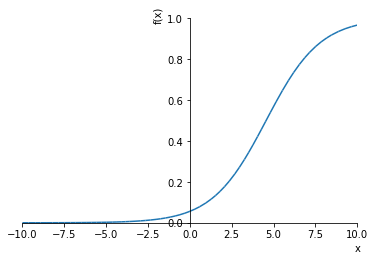

In [5]:
from sympy import *
from matplotlib import *

b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0,-2.823)
p = p.subs(b1, 0.620)
print(p)

plot(p)

In [8]:
# Using a plain logistic regression SciPy

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Perform logistic regression
# Turn off penalty
model = LogisticRegression()
model.fit(X, Y)

# print beta1
print(model.coef_.flatten()) 

# print beta0
print(model.intercept_.flatten())


[0.33467796]
[-1.15144356]


In [9]:
# Calculating the joint likelihood of observing all the points for a given logistic regression


import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1.0 - logistic_function(p.x))

print(joint_likelihood) 

4.7911180221699105e-05


In [10]:
# Using Gradient Descent on Logistic Regression



points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
	* (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

# Partial derivative for m, with points substituted
d_b1 = diff(joint_likelihood, b1) \
		   .subs(n, len(points) - 1).doit() \
		   .replace(x, lambda i: points[i].x) \
		   .replace(y, lambda i: points[i].y)

# Partial derivative for m, with points substituted
d_b0 = diff(joint_likelihood, b0) \
		   .subs(n, len(points) - 1).doit() \
		   .replace(x, lambda i: points[i].x) \
		   .replace(y, lambda i: points[i].y)

# compile using lambdify for faster computation
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# Perform Gradient Descent
b1 = 0.01
b0 = 0.01
L = .01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.692669307537082 -3.175751550409825


In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]

# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1]

# build logistic regression
fit = LogisticRegression().fit(inputs, output)

# Print coefficients:
print("COEFFICIENTS: {0}".format(fit.coef_.flatten()))
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "WILL LEAVE: {0}".format(probabilities)
    else:
        return "WILL STAY: {0}".format(probabilities)

# Test a prediction
while True:
    n = input("Predict employee will stay or leave {sex},{age},{promotions},{years employed}: ")
    (sex, age, promotions, years_employed) = n.split(",")
    print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)))

COEFFICIENTS: [-0.01032776 -0.03246604 -1.64735935  0.72823124]
INTERCEPT: [-0.34116026]
Predict employee will stay or leave {sex},{age},{promotions},{years employed}: 1,33,3,8
WILL STAY: [[0.63160194 0.36839806]]
Predict employee will stay or leave {sex},{age},{promotions},{years employed}: 1,28,2,0
WILL STAY: [[0.98959754 0.01040246]]
Predict employee will stay or leave {sex},{age},{promotions},{years employed}: 1,28,4,0
WILL STAY: [[9.99610390e-01 3.89610073e-04]]
Predict employee will stay or leave {sex},{age},{promotions},{years employed}: 


ValueError: not enough values to unpack (expected 4, got 1)

In [14]:
# You will notice that in the coefficients for sex, age, promotions, 
# and years employed are displayed in that order. By the weight of the coefficients, 
# you can see that sex and age play very little role in the prediction (they both have a weight near 0). 
# However promotions and years_employed have significant weights of -2.504 and .97. 
# Here’s a secret with this toy dataset:
#     I fabricated it so that an employee quits if they do not get a promotion roughly every 2 years.
#     Sure enough my logistic regression picked up this pattern and you can try it out with other employees as well.